In [1]:
# Import sqlite3
import sqlite3

In [2]:
# Get cursor to forest_simulation_db
cur = sqlite3.connect("/shares/wegner.ics.uzh/CHELSA/future_eu_forest/forest_simulation_db_v1.1.sqlite").cursor()

In [3]:
# Get all table names in db
#cur.execute("SELECT name FROM sqlite_master").fetchall()

In [4]:
# Retrieve all tables that contain simulation_states
sim_states = [t[0] for t in cur.execute("SELECT name FROM sqlite_master").fetchall() if "_states" in t[0]]

In [5]:
# Print all sim state tables names
#sim_states

In [6]:
# From all sim_state tables copy uniqueID,simulationID,Year,MeanHeight,LAI,MinHeight,MaxHeight,sp_state2 if 1980 < year < 2101
legal_states = []
for ts in sim_states:
    #l = cur.execute("SELECT uniqueID,simulationID,Year,MeanHeight,LAI,MinHeight,MaxHeight,sp_state2 FROM " + ts + " WHERE Year > 1980 AND Year < 2101").fetchall()
    l = cur.execute("SELECT uniqueID,simulationID,Year,MeanHeight,LAI,MinHeight,MaxHeight,sp_state2 FROM " + ts).fetchall()
    print(ts, len(l))
    legal_states += l
print(len(legal_states))

simulationdata_user_1003_states 12310
simulationdata_user_1004_states 16563
simulationdata_user_1005_states 409
simulationdata_user_1008_states 59200
simulationdata_user_1009_states 1780
simulationdata_user_1010_states 3076
simulationdata_user_1011_states 13620
simulationdata_user_1012_states 3758740
simulationdata_user_1013_states 4500
simulationdata_user_1015_states 507600
simulationdata_user_1016_states 2131341
simulationdata_user_1019_states 583
simulationdata_user_1021_states 7508250
simulationdata_user_1022_states 84263
simulationdata_user_1023_states 26857
simulationdata_user_1024_states 30240
simulationdata_user_1025_states 159737
simulationdata_user_1026_states 2312
simulationdata_user_1028_states 470115
simulationdata_user_1029_states 917242
simulationdata_user_1030_states 2179231
simulationdata_user_1031_states 1183874
simulationdata_user_1032_states 26787791
simulationdata_user_1033_states 11721541
simulationdata_user_1034_states 18144439
simulationdata_user_1035_states 867

In [8]:
# Print the first legal state
legal_states[0]

(1003, 2, 1970, 13.81, 4.18, 8.97, 19.09, 'PIAB')

In [9]:
# Import pandas
import pandas as pd

In [10]:
# Turn legal states list into a dataframe, renaming simulationID to ID to match with the metadata
df = pd.DataFrame(legal_states, columns =['uniqueID','ID','Year','MeanHeight','LAI','MinHeight','MaxHeight','sp_state2'])
del legal_states
print(df)

           uniqueID        ID  Year  MeanHeight       LAI  MinHeight  \
0            1003.0       2.0  1970   13.810000  4.180000   8.970000   
1            1003.0       2.0  1971   13.960000  4.240000   8.980000   
2            1003.0       2.0  1972   14.170000  4.340000   9.000000   
3            1003.0       2.0  1973   14.180000  4.320000   9.090000   
4            1003.0       2.0  1974   14.580000  4.500000   9.150000   
...             ...       ...   ...         ...       ...        ...   
135375578    1047.0  170674.0   127   20.340224  6.409481   3.783706   
135375579    1047.0  170674.0   128   21.019586  6.461197   5.254753   
135375580    1047.0  170674.0   129   21.593377  6.518673   3.877463   
135375581    1047.0  170674.0   130   22.254739  6.573533   3.937319   
135375582    1047.0  170674.0   131   22.834171  6.584058   4.910827   

           MaxHeight sp_state2  
0          19.090000      PIAB  
1          19.280000      PIAB  
2          19.510000      PIAB  
3  

In [11]:
# Load metadata for all simulations as dataframe. This is the metadata_all table from the database as .csv
meta = pd.read_csv("metadata_all.csv")
print(meta)

/sctmp/jdolli/ipykernel_620627/3067080922.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("metadata_all.csv")


         uniqueID        ID  Model                         ModelDOI  \
0          1003.0   38838.0  iLand  10.1016/j.ecolmodel.2012.02.015   
1          1003.0   38839.0  iLand  10.1016/j.ecolmodel.2012.02.015   
2          1003.0   38840.0  iLand  10.1016/j.ecolmodel.2012.02.015   
3          1003.0   38841.0  iLand  10.1016/j.ecolmodel.2012.02.015   
4          1003.0   38842.0  iLand  10.1016/j.ecolmodel.2012.02.015   
...           ...       ...    ...                              ...   
1122535    1047.0  170670.0  iLand  10.1016/j.ecolmodel.2012.02.015   
1122536    1047.0  170671.0  iLand  10.1016/j.ecolmodel.2012.02.015   
1122537    1047.0  170672.0  iLand  10.1016/j.ecolmodel.2012.02.015   
1122538    1047.0  170673.0  iLand  10.1016/j.ecolmodel.2012.02.015   
1122539    1047.0  170674.0  iLand  10.1016/j.ecolmodel.2012.02.015   

               Lon        Lat   Country  WHC  TextureSand  TextureSilt  \
0        23.459557  60.970536   Finland  NaN    83.670968    15.168169   

In [12]:
# Merge the legal states with their meta information into one file and drop unimportant columns
full_legal = pd.merge(df, meta, on=["uniqueID","ID"])
full_legal = full_legal.drop(columns=["TextureSilt","WHC","TextureSand","TextureClay","SoilDepth","SoilWaterRating","AvailableNitrogen","FertilityRating"])
print(full_legal)

           uniqueID        ID  Year  MeanHeight       LAI  MinHeight  \
0            1003.0       2.0  1970   13.810000  4.180000   8.970000   
1            1003.0       2.0  1971   13.960000  4.240000   8.980000   
2            1003.0       2.0  1972   14.170000  4.340000   9.000000   
3            1003.0       2.0  1973   14.180000  4.320000   9.090000   
4            1003.0       2.0  1974   14.580000  4.500000   9.150000   
...             ...       ...   ...         ...       ...        ...   
135375578    1047.0  170674.0   127   20.340224  6.409481   3.783706   
135375579    1047.0  170674.0   128   21.019586  6.461197   5.254753   
135375580    1047.0  170674.0   129   21.593377  6.518673   3.877463   
135375581    1047.0  170674.0   130   22.254739  6.573533   3.937319   
135375582    1047.0  170674.0   131   22.834171  6.584058   4.910827   

           MaxHeight sp_state2  Model                         ModelDOI  \
0          19.090000      PIAB  iLand  10.1016/j.ecolmodel.20

In [154]:
# Save all legal states
full_legal.to_csv("legal_states.csv")

In [13]:
# See how many unique locations appear in the 
full_legal.nunique()

uniqueID            38
ID              457444
Year               696
MeanHeight    43294542
LAI           43290039
MinHeight      9037766
MaxHeight     11747784
sp_state2         2460
Model               21
ModelDOI            48
Lon              13555
Lat              13541
Country             22
Climate             28
GCM                 52
RCM                 27
Management           2
dtype: int64

In [14]:
all_locs =  full_legal[["Lon", "Lat", "Country"]].groupby(["Lon", "Lat"], group_keys=True).agg(lambda x:x.value_counts().index[0]).reset_index()

In [15]:
len(all_locs)

13599

In [17]:
above_30 = full_legal[full_legal["uniqueID"] > 1030]

In [18]:
above_30

,uniqueID,ID,Year,MeanHeight,LAI,MinHeight,MaxHeight,sp_state2,Model,ModelDOI,Lon,Lat,Country,Climate,GCM,RCM,Management
17887969,1031.0,170675.0,1,25.246636,3.938432,3.968723,48.786816,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,Observed,NaN,NaN,B
17887970,1031.0,170675.0,2,25.322956,3.956757,4.545002,48.818123,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,Observed,NaN,NaN,B
17887971,1031.0,170675.0,3,25.587624,4.000526,4.629666,48.874432,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,Observed,NaN,NaN,B
17887972,1031.0,170675.0,4,25.373223,4.023475,3.707015,48.922443,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,Observed,NaN,NaN,B
17887973,1031.0,170675.0,5,25.774122,4.043590,3.819288,48.935192,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,Observed,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135375578,1047.0,170674.0,127,20.340224,6.409481,3.783706,41.203632,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,RCP8.5,mpi-esm-lr,rca4,B
135375579,1047.0,170674.0,128,21.019586,6.461197,5.254753,41.428642,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,RCP8.5,mpi-esm-lr,rca4,B
135375580,1047.0,170674.0,129,21.593377,6.518673,3.877463,41.665611,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,RCP8.5,mpi-esm-lr,rca4,B
135375581,1047.0,170674.0,130,22.254739,6.573533,3.937319,41.932556,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,20.19,48.98,Slovakia,RCP8.5,mpi-esm-lr,rca4,B


In [19]:
above_30_locs =  above_30[["Lon", "Lat", "Country"]].groupby(["Lon", "Lat"], group_keys=True).agg(lambda x:x.value_counts().index[0]).reset_index()

In [20]:
len(above_30_locs)

7

In [21]:
below_30 = full_legal[full_legal["uniqueID"] <= 1030]
below_30

,uniqueID,ID,Year,MeanHeight,LAI,MinHeight,MaxHeight,sp_state2,Model,ModelDOI,Lon,Lat,Country,Climate,GCM,RCM,Management
0,1003.0,2.0,1970,13.810000,4.180000,8.970000,19.090000,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,24.717919,62.036992,Finland,Baseline,NaN,NaN,N
1,1003.0,2.0,1971,13.960000,4.240000,8.980000,19.280000,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,24.717919,62.036992,Finland,Baseline,NaN,NaN,N
2,1003.0,2.0,1972,14.170000,4.340000,9.000000,19.510000,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,24.717919,62.036992,Finland,Baseline,NaN,NaN,N
3,1003.0,2.0,1973,14.180000,4.320000,9.090000,19.580000,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,24.717919,62.036992,Finland,Baseline,NaN,NaN,N
4,1003.0,2.0,1974,14.580000,4.500000,9.150000,19.940000,PIAB,iLand,10.1016/j.ecolmodel.2012.02.015,24.717919,62.036992,Finland,Baseline,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887964,1030.0,85432119.0,2096,7.701792,1.158329,5.024612,10.074205,phlaquil,MEDFATE,10.1016/j.agrformet.2020.108233,0.516110,40.622307,Spain,RCP85,MPI-M-MPI-ESM-LR,RCA4,N
17887965,1030.0,85432119.0,2097,7.756569,1.231625,5.024612,10.123930,phlaquil,MEDFATE,10.1016/j.agrformet.2020.108233,0.516110,40.622307,Spain,RCP85,MPI-M-MPI-ESM-LR,RCA4,N
17887966,1030.0,85432119.0,2098,7.792416,1.448495,5.024612,10.151838,phlaquil,MEDFATE,10.1016/j.agrformet.2020.108233,0.516110,40.622307,Spain,RCP85,MPI-M-MPI-ESM-LR,RCA4,N
17887967,1030.0,85432119.0,2099,7.818209,1.593303,5.024612,10.171783,phlaquil,MEDFATE,10.1016/j.agrformet.2020.108233,0.516110,40.622307,Spain,RCP85,MPI-M-MPI-ESM-LR,RCA4,N


In [22]:
below_30_locs =  below_30[["Lon", "Lat", "Country"]].groupby(["Lon", "Lat"], group_keys=True).agg(lambda x:x.value_counts().index[0]).reset_index()
len(below_30_locs)

13593

In [175]:
# Divide legal states by their year, so they can be aggregated
states_1981_2010 = full_legal[full_legal["Year"]<2011]
states_1981_2010 = states_1981_2010[states_1980_2010["Year"]>1980]
states_1981_2010.nunique()

uniqueID          14
ID             44606
Year              30
MeanHeight    358900
LAI           147402
MinHeight     109180
MaxHeight     126157
sp_state2        867
Model             17
ModelDOI          18
Lon            10671
Lat            10670
Country           14
Climate           23
GCM               21
RCM               10
Management         2
dtype: int64

In [176]:
states_2011_2040 = full_legal[full_legal["Year"]<2041]
states_2011_2040 = states_2011_2040[states_2011_2040["Year"]>2010]
states_2011_2040.nunique()

uniqueID          16
ID             41897
Year              30
MeanHeight    875482
LAI           758515
MinHeight     496163
MaxHeight     745694
sp_state2       1383
Model             18
ModelDOI          20
Lon            12840
Lat            12839
Country           14
Climate           24
GCM               21
RCM               10
Management         2
dtype: int64

In [177]:
states_2041_2070 = full_legal[full_legal["Year"]<2071]
states_2041_2070 = states_2041_2070[states_2041_2070["Year"]>2040]
states_2041_2070.nunique()

uniqueID           14
ID             162482
Year               30
MeanHeight    2543166
LAI            882210
MinHeight      532688
MaxHeight      800050
sp_state2        1512
Model              16
ModelDOI           17
Lon             12865
Lat             12865
Country            14
Climate            21
GCM                21
RCM                10
Management          2
dtype: int64

In [178]:
states_2071_2100 = full_legal[full_legal["Year"]<2101]
states_2071_2100 = states_2071_2100[states_2071_2100["Year"]>2070]
states_2071_2100.nunique()

uniqueID           13
ID             139543
Year               30
MeanHeight    2491395
LAI            879092
MinHeight      501383
MaxHeight      729422
sp_state2        1624
Model              15
ModelDOI           16
Lon             12851
Lat             12851
Country            13
Climate            20
GCM                21
RCM                10
Management          2
dtype: int64

In [200]:
# states_1981_2010 states_2011_2040 states_2041_2070 states_2071_2100
legit_climates = ["RCP85", "RCP8.5", "none", "Observed1", "Observed2", "Observed3", "Observed4", "Observed5", "Observed6", "Observed7", "Observed8", "Baseline"]
#legit_climates = ["RCP85", "RCP8.5"]
cs = states_1981_2010
lclims = cs[cs["Climate"].isin(legit_climates)]

In [ ]:
cs = states_2041_2070
print(cs.nunique())
legit_gcm = ["MPI-M-MPI-ESM-LR"]
cs[cs["GCM"].isin(legit_gcm)].nunique()

In [136]:
domSpec_81_10 = states_1981_2010.groupby("Lon")[["sp_state2"]].agg(lambda x:x.value_counts().index[0])

In [138]:
dom_spec_counts = domSpec_81_10["sp_state2"].apply(lambda x: x.upper()[:4]).value_counts()

In [ ]:
print(len(dom_spec_counts), dom_spec_counts.to_numpy().sum())
for cutoff in[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    print(cutoff)
    print(len(dom_spec_counts[dom_spec_counts>cutoff].to_numpy()), dom_spec_counts[dom_spec_counts>cutoff].to_numpy().sum())


# Plan
Have two tasks:
- Regression of LAI, MeanHeight, MinHeight, MaxHeight (Get mean, median, min, max, std for each value?)
- Classification of dominant species (65 four-letter geni in current climate, but bad distribution) -> Only use future values whose genus appears in the present

## Questions
- Is my genus computation correct?
- Use gnues who is dominant in most years or do distribution?
- Should I remove locations whos genus appears very rarely?
- How many actual "simulation" locations do we have -> Plot 13k locations with that interactive openstreetmap option and color by uniqueID
- For how many locations do we have future values, but not current ones?

In [166]:
import plotly.express as px
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib

In [198]:
locs = cs[["Lon", "Lat", "Country"]].groupby(["Lon", "Lat"], group_keys=True).agg(lambda x:x.value_counts().index[0]).reset_index()
locs["Country"].value_counts()

Spain             10379
Switzerland          89
Finland              73
France               66
Belgium              28
Sweden               27
Germany               6
Austria               5
Slovenia              5
Italy                 4
Denmark               3
Czechia               1
Czech Republic        1
Ukraine               1
Name: Country, dtype: int64

In [201]:
# states_1981_2010 states_2011_2040 states_2041_2070 states_2071_2100
locs = lclims[["Lon", "Lat", "Country"]].groupby(["Lon", "Lat"], group_keys=True).agg(lambda x:x.value_counts().index[0]).reset_index()
locs["Country"].value_counts()

Spain          10373
Switzerland       71
Finland           71
France            64
Sweden            27
Belgium            6
Austria            5
Slovenia           5
Germany            2
Italy              2
Denmark            1
Name: Country, dtype: int64

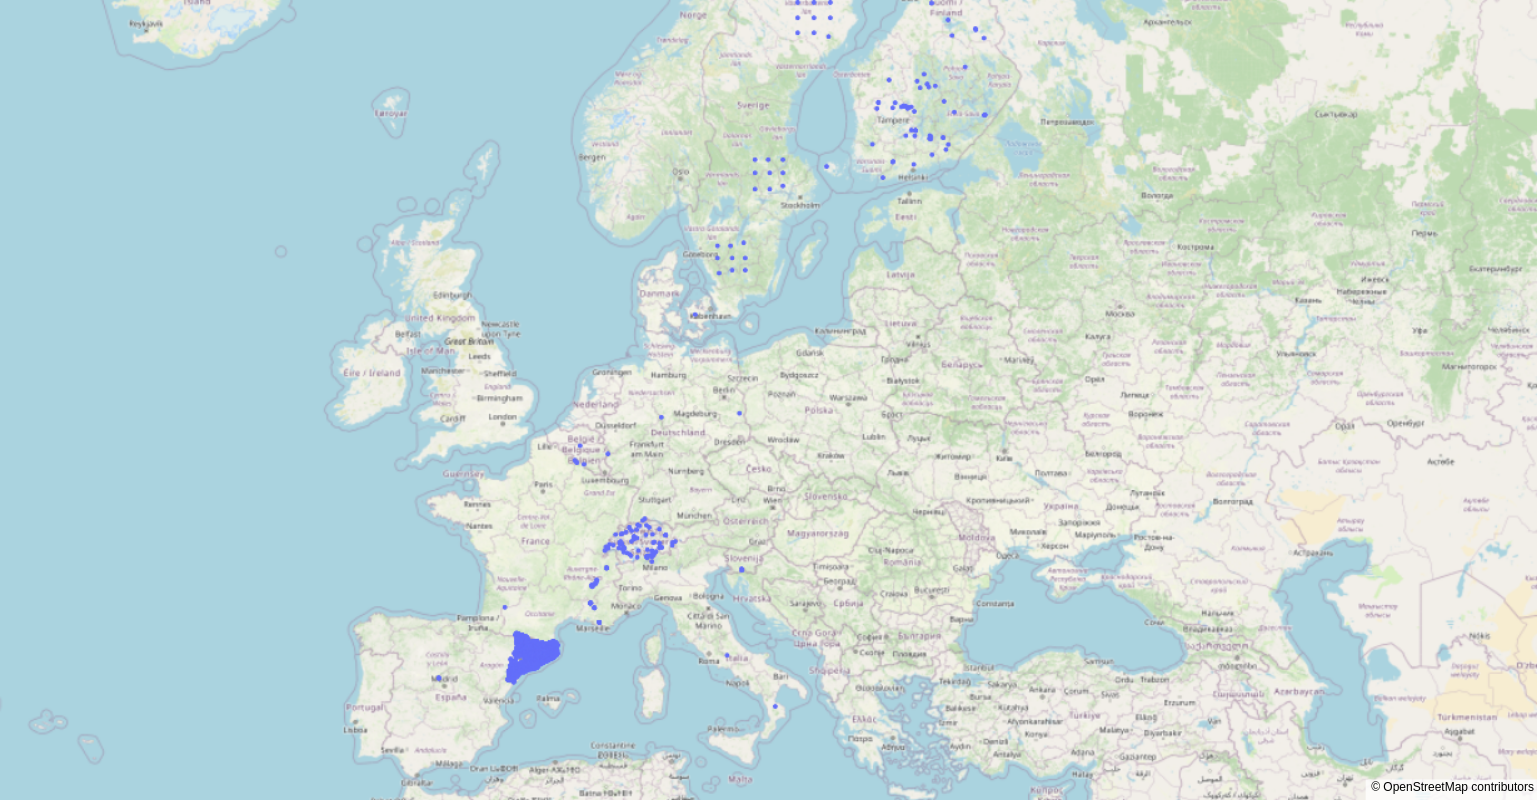

In [202]:
fig = px.scatter_mapbox(locs, 
                        lat="Lat", 
                        lon="Lon",
                        height=800,
                        width=800,
                        zoom=3)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()